# GRIP TASK 2 - Prediction using Unsupervised ML
## by Vinay Khanduri

## Importing the basic libraries that'll be required for this task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

###### %matplotlib inline 
It ensures that the plots are produced and stored within this Jupyter notebook.

## Importing the dataset

In [2]:
dataset = sns.load_dataset('iris')

We have successfully imported the dataset. Now, let's take a look at the first 10 rows of our dataset so that we can know what kind of data we are dealing with right now.

In [3]:
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Performing basic data analysis and visualization

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


###### dataset.info()
It gives us a concise summary of the data that we are currently trying to analyze.

In [5]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

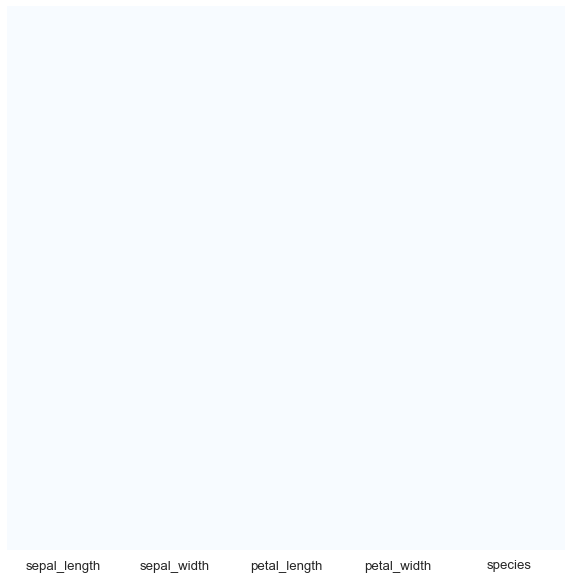

In [6]:
sns.set(rc = {'figure.figsize': (10, 10)}, font_scale = 1.2)
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')
plt.show()

This shows that no data is missing from our dataset so, we don't have to impute our data.

### Visualizing Data

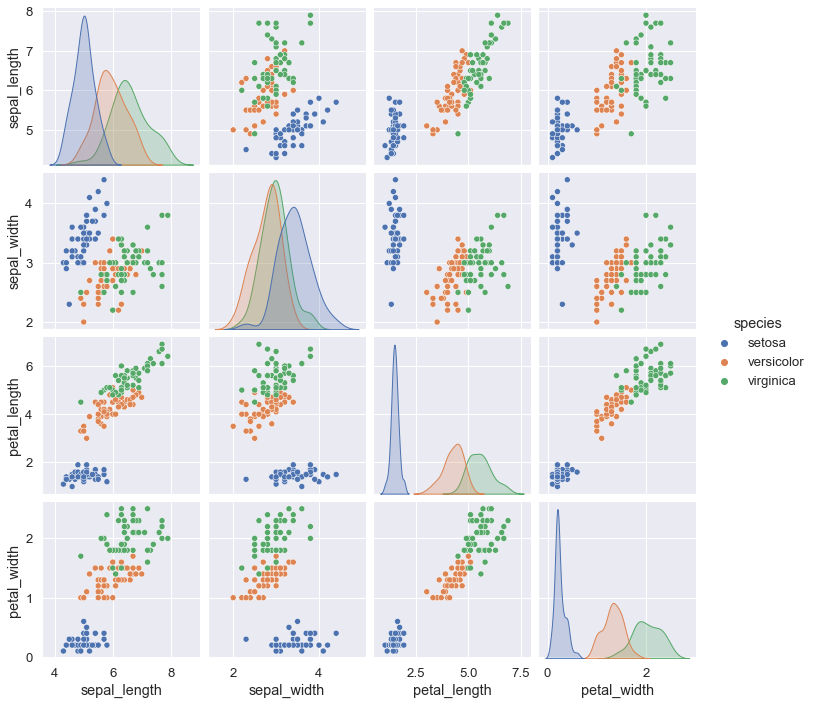

In [7]:
sns.set(rc = {'figure.figsize': (10, 10)}, font_scale = 1.2)
sns.pairplot(dataset, hue = 'species')
plt.show()

In [8]:
dataset.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### Finding optimum number of clusters using Elbow Method

In [9]:
X = dataset.iloc[:, :-1].values

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    classifier = KMeans(n_clusters = i)
    classifier.fit(X)
    wcss.append(classifier.inertia_)

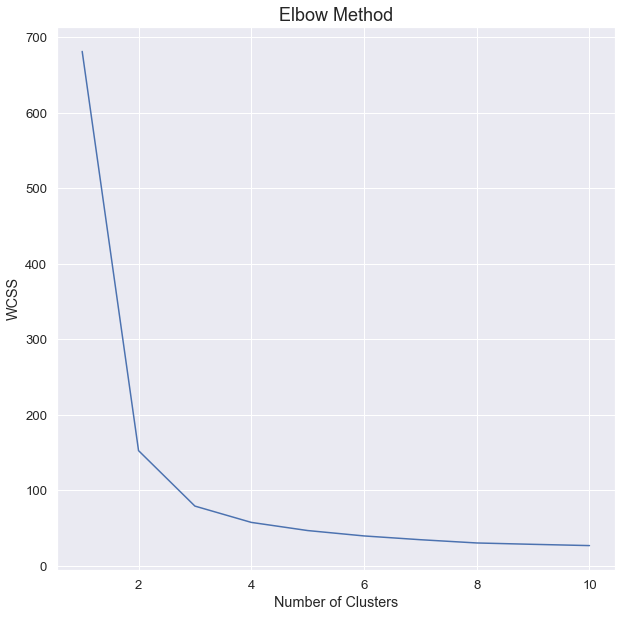

In [11]:
sns.set(rc = {'figure.figsize': (10, 10)}, font_scale = 1.2)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method', size = 18)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

Therefore, we can observe from the graph that the optimum number of clusters for this dataset = 3

## Training the KMeans Classifier using the optimum number of clusters

In [12]:
classifier = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
classifier.fit(X)
y_pred = classifier.predict(X)

In [13]:
classifier.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

## Visualizing the clusters and centroids on a plot

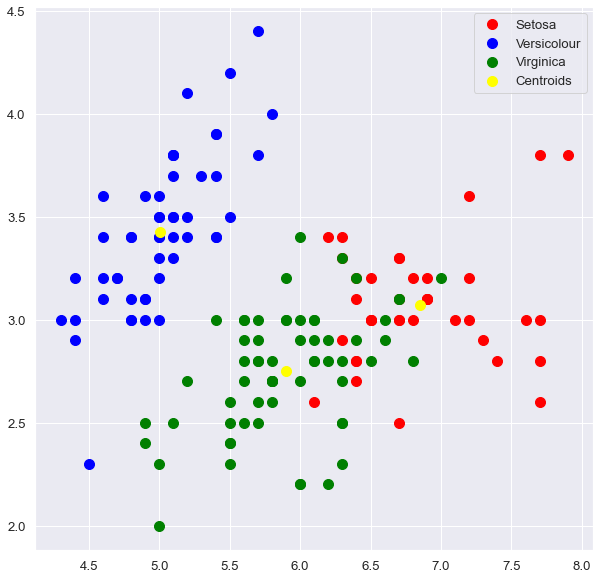

In [14]:
sns.set(rc = {'figure.figsize': (10, 10)}, font_scale = 1.2)
plt.scatter(np.array(X[y_pred == 0, 0]), np.array(X[y_pred == 0, 1]), s = 100, c = 'red', label = 'Setosa')
plt.scatter(np.array(X[y_pred == 1, 0]), np.array(X[y_pred == 1, 1]), s = 100, c = 'blue', label = 'Versicolour')
plt.scatter(np.array(X[y_pred == 2, 0]), np.array(X[y_pred == 2, 1]), s = 100, c = 'green', label = 'Virginica')
plt.scatter(classifier.cluster_centers_[:, 0], classifier.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()